In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
sns.set_style("darkgrid")

In [2]:
os.path

<module 'ntpath' from 'c:\\Python38\\lib\\ntpath.py'>

In [3]:
df = pd.read_csv('./Compliance_JVel_BVel_fullbody_leader_Org_.csv')
# df = pd.read_csv("C:\\Program Files\\CoppeliaRobotics\\CoppeliaSimEdu\\scenes\\SOLM\\jointVel_bodyVel_3D_analysis.csv")
# df = pd.read_csv("C:\\Program Files\\CoppeliaRobotics\\CoppeliaSimEdu\\scenes\\SOLM\\Compliance_JVel_BVel_fullbody_leader_Org_.csv")
df.head()

,Time (s),JointVel_1_R1,JointVel_2_R1,JointVel_3_R1,JointVel_1_R2,JointVel_2_R2,JointVel_3_R2,JointVel_1_L1,JointVel_2_L1,JointVel_3_L1,...,Body Vel Z R1,Body Vel X R2,Body Vel Y R2,Body Vel Z R2,Body Vel X L1,Body Vel Y L1,Body Vel Z L1,Body Vel X L2,Body Vel Y L2,Body Vel Z L2
0,1.00,-0.257,-0.061,0.128,-0.258,0.061,-0.128,-0.034,-0.060,-0.019,...,0.018,0.069,-0.024,-0.018,0.031,0.024,0.018,0.031,-0.024,-0.018
1,1.01,-0.741,-0.172,0.367,-0.743,0.172,-0.363,-0.092,-0.168,-0.059,...,0.037,0.149,-0.053,-0.037,0.067,0.052,0.037,0.068,-0.053,-0.037
2,1.02,-1.086,-0.232,0.532,-1.095,0.232,-0.513,-0.122,-0.226,-0.105,...,0.048,0.208,-0.074,-0.046,0.094,0.072,0.047,0.095,-0.074,-0.047
3,1.03,-1.308,-0.250,0.631,-1.330,0.251,-0.590,-0.133,-0.242,-0.152,...,0.050,0.249,-0.089,-0.047,0.112,0.085,0.049,0.114,-0.090,-0.049
4,1.04,-1.432,-0.236,0.677,-1.470,0.241,-0.611,-0.131,-0.227,-0.198,...,0.047,0.275,-0.098,-0.043,0.124,0.092,0.045,0.127,-0.100,-0.046


In [45]:
# Filter out rows where Joint Vel 1, Joint Vel 2, and Joint Vel 3 are all zero
df = df[~((abs(df["JointVel_1_R1"]) < 0.1) & 
          (abs(df["JointVel_2_R1"]) < 0.1) & 
          (abs(df["JointVel_3_R1"]) < 0.1) &
          (abs(df["JointVel_1_R2"]) < 0.1) & 
          (abs(df["JointVel_2_R2"]) < 0.1) &
          (abs(df["JointVel_3_R2"]) < 0.1) &
          (abs(df["JointVel_1_L1"]) < 0.1) & 
          (abs(df["JointVel_2_L1"]) < 0.1) & 
          (abs(df["JointVel_3_L1"]) < 0.1) &
          (abs(df["JointVel_1_L2"]) < 0.1) & 
          (abs(df["JointVel_2_L2"]) < 0.1) & 
          (abs(df["JointVel_3_L2"]) < 0.1)
          )]

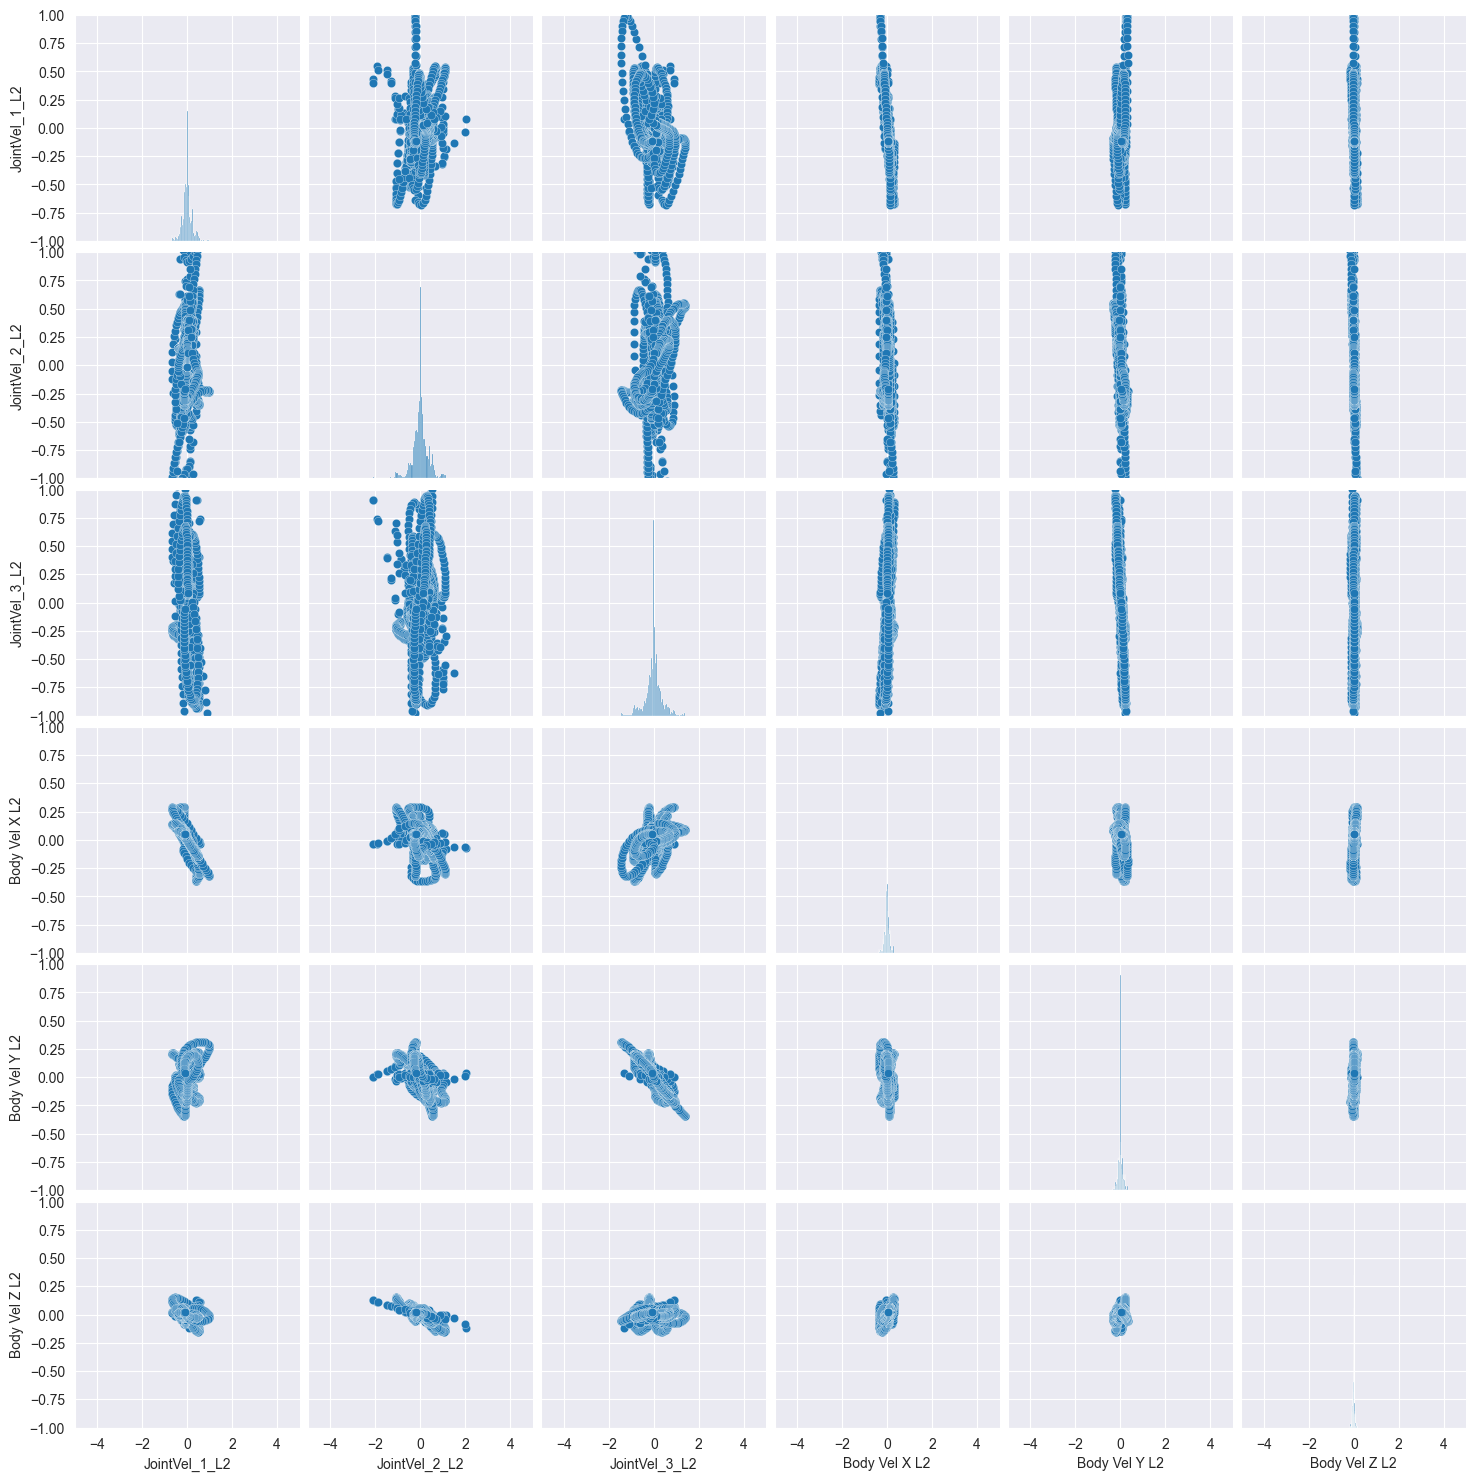

In [4]:
# independent joitn activation (calibrate data)
selected_colums_R1 = ["JointVel_1_R1", "JointVel_2_R1", "JointVel_3_R1", "Body Vel X R1", "Body Vel Y R1", "Body Vel Z R1"]
selected_colums_R2 = ["JointVel_1_R2", "JointVel_2_R2", "JointVel_3_R2", "Body Vel X R2", "Body Vel Y R2", "Body Vel Z R2"]
selected_colums_L1 = ["JointVel_1_L1", "JointVel_2_L1", "JointVel_3_L1", "Body Vel X L1", "Body Vel Y L1", "Body Vel Z L1"]
selected_colums_L2 = ["JointVel_1_L2", "JointVel_2_L2", "JointVel_3_L2", "Body Vel X L2", "Body Vel Y L2", "Body Vel Z L2"]
pair_plot = sns.pairplot(df[selected_colums_L2],
                         plot_kws={'edgecolor': 'white', 'linewidth': 0.2})
pair_plot.set(xlim=(-5,5), ylim = (-1,1))


In [23]:
df.columns

Index(['Time (s)', 'JointVel_1_R1', 'JointVel_2_R1', 'JointVel_3_R1',
       'JointVel_1_R2', 'JointVel_2_R2', 'JointVel_3_R2', 'JointVel_1_L1',
       'JointVel_2_L1', 'JointVel_3_L1', 'JointVel_1_L2', 'JointVel_2_L2',
       'JointVel_3_L2', 'Body Vel X', 'Body Vel Y', 'Body Vel Z'],
      dtype='object')

In [5]:
# Step 1: Melt the joint velocities into a single 'Joint Vel' column with a 'Joint Number'
df_joint_melt = df.melt(id_vars=['Time (s)'], 
                        value_vars=['JointVel_1_R1', 'JointVel_2_R1', 'JointVel_3_R1'],
                        var_name='Joint Number', 
                        value_name='Joint Vel')

# Extract the joint number from the column name and clean it up
df_joint_melt['Joint Number'] = df_joint_melt['Joint Number'].str.extract('(\d)').astype(int)

# Step 2: Melt the body velocities into a single 'Body Vel' column with an 'Axis'
df_body_melt = df.melt(id_vars=['Time (s)'], 
                       value_vars=['Body Vel X R1', 'Body Vel Y R1', 'Body Vel Z R1'],
                       var_name='Body Axis', 
                       value_name='Body Vel')

# Extract the axis from the column name and clean it up
df_body_melt['Body Axis'] = df_body_melt['Body Axis'].str.extract('([XYZ])')

# Step 3: Merge the two melted DataFrames back into one (on Time)
df_final = pd.merge(df_joint_melt, df_body_melt, on='Time (s)')

# Show the resulting DataFrame
df_final

,Time (s),Joint Number,Joint Vel,Body Axis,Body Vel
0,1.00,1,-0.257,X,0.068
1,1.00,1,-0.257,Y,0.024
2,1.00,1,-0.257,Z,0.018
3,1.00,2,-0.061,X,0.068
4,1.00,2,-0.061,Y,0.024
...,...,...,...,...,...
18895,21.99,2,0.210,Y,0.053
18896,21.99,2,0.210,Z,-0.039
18897,21.99,3,0.113,X,0.065
18898,21.99,3,0.113,Y,0.053


C:\Users\binggwong\AppData\Local\Temp\ipykernel_60540\4220753205.py:5: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(
C:\Users\binggwong\AppData\Local\Temp\ipykernel_60540\4220753205.py:11: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(


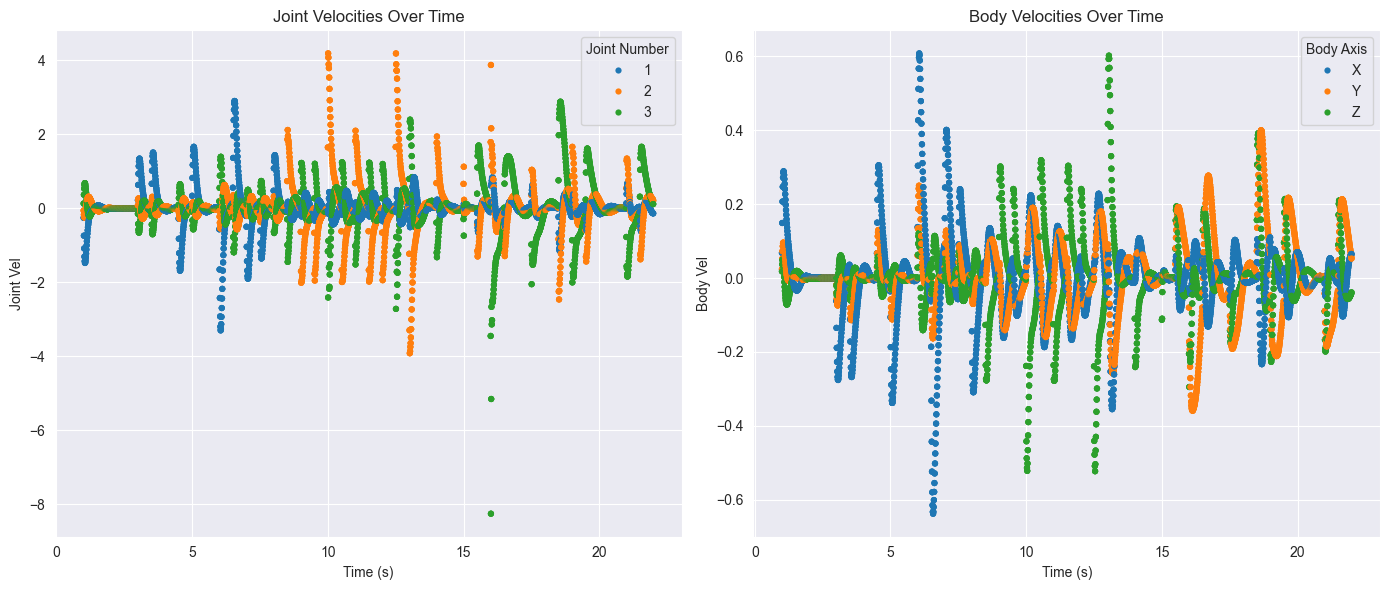

In [6]:
# Create a figure with two subplots (left and right)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First relational plot (left)
sns.scatterplot(
    x='Time (s)', y='Joint Vel', hue='Joint Number', data=df_final, ax=axes[0], palette=sns.color_palette(),edgecolor='none', s=20
)
axes[0].set_title('Joint Velocities Over Time')

# Second relational plot (right)
sns.scatterplot(
    x='Time (s)', y='Body Vel', hue='Body Axis', data=df_final, ax=axes[1], palette=sns.color_palette(), edgecolor='none', s=20 
)
axes[1].set_title('Body Velocities Over Time')

# Adjust layout to avoid overlap
plt.tight_layout()
# Show the combined plots
plt.show()

In [59]:
# Define X (input features) and Y (output labels) in a generalized way
X = df[["JointVel_1_R1", "JointVel_2_R1", "JointVel_3_R1"]].values  # Input: Joint velocities
Y = df[["Body Vel X", "Body Vel Y", "Body Vel Z"]].values      # Output: Body velocities

# Solve the linear regression using the normal equation: W = (X.T X)^(-1) X.T Y
W = np.linalg.inv(X.T @ X) @ X.T @ Y

# Print the estimated weights (Jacobian matrix)
print("Estimated Jacobian Matrix (W):")
print(W)

Estimated Jacobian Matrix (W):
[[-0.19661848  0.03760351  0.00281658]
 [ 0.02724542  0.11456492 -0.04710373]
 [-0.05076904  0.14051955  0.01577075]]


In [60]:
# Add a small epsilon to avoid division by zero
epsilon = 1e-8  # Small value to prevent division by zero

# Compute the maximum along the columns, but add epsilon to prevent division by zero
sum_joint_contr = np.sum(abs(W), axis=0, keepdims=True) + epsilon
print(sum_joint_contr)

# Perform the division safely
W_normalized = W / sum_joint_contr

# Print the result
print("Normalize Jacobian Matrix (W):")
print(W_normalized)


[[0.27463295 0.29268799 0.06569107]]
Normalize Jacobian Matrix (W):
[[-0.71593186  0.12847643  0.0428761 ]
 [ 0.09920668  0.39142338 -0.71704929]
 [-0.18486142  0.48010016  0.24007446]]


### All legs weight estimation

In [7]:
Weights = []
# Define X (input features) and Y (output labels) in a generalized way
leg_label = ['R1', 'R2', 'L1', 'L2']
for i in range(4):
    X = df[["JointVel_1_"+leg_label[i], "JointVel_2_"+leg_label[i], "JointVel_3_"+leg_label[i]]].values  # Input: Joint velocities
    Y = df[["Body Vel X "+leg_label[i], "Body Vel Y "+leg_label[i], "Body Vel Z "+leg_label[i]]].values      # Output: Body velocities

    # Solve the linear regression using the normal equation: W = (X.T X)^(-1) X.T Y
    W = np.linalg.inv(X.T @ X) @ X.T @ Y

    Weights.append(W)

# Print the estimated weights (Jacobian matrix)
for i in range(4):
    print("Estimated Jacobian Matrix (W) number {}: ".format(i+1))
    print(Weights[i])
    print('-----')

Estimated Jacobian Matrix (W) number 1: 
[[-0.24526615 -0.01576397  0.01223504]
 [ 0.03600058  0.12454632 -0.13673327]
 [-0.03638832  0.17092794  0.02198423]]
-----
Estimated Jacobian Matrix (W) number 2: 
[[-0.22592705  0.00642318 -0.01073046]
 [ 0.00870796  0.1268948  -0.10068686]
 [ 0.01433034  0.19854066  0.0183395 ]]
-----
Estimated Jacobian Matrix (W) number 3: 
[[-0.33260637 -0.01616821 -0.02928372]
 [ 0.03369775 -0.18435716 -0.19477344]
 [-0.06905398 -0.17265914  0.06775851]]
-----
Estimated Jacobian Matrix (W) number 4: 
[[-0.32002563 -0.03765521 -0.05208204]
 [-0.08592591 -0.11949183 -0.08483322]
 [ 0.06233322 -0.21225627  0.00734386]]
-----


In [8]:
# Add a small epsilon to avoid division by zero
epsilon = 1e-8  # Small value to prevent division by zero

# Compute the maximum along the columns, but add epsilon to prevent division by zero
for i in range(4):
    sum_joint_contr = np.sum(abs(Weights[i]), axis=0, keepdims=True) + epsilon
    print(sum_joint_contr)

    # Perform the division safely
    W_normalized = Weights[i] / sum_joint_contr

    # Print the result
    print("Normalize Jacobian Matrix (W) {} :".format(i+1))
    print(W_normalized)
    print('-------')


[[0.31765506 0.31123824 0.17095255]]
Normalize Jacobian Matrix (W) 1 :
[[-0.77211471 -0.05064921  0.07156979]
 [ 0.11333232  0.40016394 -0.79983169]
 [-0.11455294  0.54918682  0.12859845]]
-------
[[0.24896536 0.33185866 0.12975684]]
Normalize Jacobian Matrix (W) 2 :
[[-0.90746382  0.01935517 -0.0826967 ]
 [ 0.03497658  0.38237606 -0.77596574]
 [ 0.05755956  0.59826875  0.14133748]]
-------
[[0.43535811 0.37318451 0.29181568]]
Normalize Jacobian Matrix (W) 3 :
[[-0.7639834  -0.04332497 -0.10035007]
 [ 0.07740237 -0.49401074 -0.66745365]
 [-0.15861421 -0.46266426  0.23219625]]
-------
[[0.46828476 0.36940332 0.14425913]]
Normalize Jacobian Matrix (W) 4 :
[[-0.68339961 -0.10193522 -0.36103115]
 [-0.18349072 -0.32347253 -0.58806139]
 [ 0.13310965 -0.57459222  0.05090739]]
-------


In [9]:
w_ref = np.array([[-0.76573473, -0.05958105,  0.06557672],
                  [ 0.09768343,  0.41070751, -0.75010992],
                  [-0.13658181,  0.5297114,   0.18431331]])
W_norm = []
for i in range(4):
    sum_joint_contr = np.sum(abs(Weights[i]), axis=0, keepdims=True) + epsilon
    print(sum_joint_contr)

    # Perform the division safely
    W_normalized = Weights[i] / sum_joint_contr
    W_norm.append(W_normalized)

    # Print the result
    print("Normalize Jacobian Matrix (W) {} :".format(i+1))
    print(w_ref-W_normalized)
    print('-------')

[[0.31765506 0.31123824 0.17095255]]
Normalize Jacobian Matrix (W) 1 :
[[ 0.00637998 -0.00893184 -0.00599307]
 [-0.01564889  0.01054357  0.04972177]
 [-0.02202887 -0.01947542  0.05571486]]
-------
[[0.24896536 0.33185866 0.12975684]]
Normalize Jacobian Matrix (W) 2 :
[[ 0.14172909 -0.07893622  0.14827342]
 [ 0.06270685  0.02833145  0.02585582]
 [-0.19414137 -0.06855735  0.04297583]]
-------
[[0.43535811 0.37318451 0.29181568]]
Normalize Jacobian Matrix (W) 3 :
[[-0.00175133 -0.01625608  0.16592679]
 [ 0.02028106  0.90471825 -0.08265627]
 [ 0.0220324   0.99237566 -0.04788294]]
-------
[[0.46828476 0.36940332 0.14425913]]
Normalize Jacobian Matrix (W) 4 :
[[-0.08233512  0.04235417  0.42660787]
 [ 0.28117415  0.73418004 -0.16204853]
 [-0.26969146  1.10430362  0.13340592]]
-------


In [42]:
W_norm

[array([[-0.76573473, -0.05958105,  0.06557672],
        [ 0.09768343,  0.41070751, -0.75010992],
        [-0.13658181,  0.5297114 ,  0.18431331]]),
 array([[-0.95411831,  0.01351631, -0.10223504],
        [-0.0181664 ,  0.38793915, -0.73979996],
        [ 0.02771525,  0.59854451,  0.15796493]]),
 array([[-0.7459248 , -0.03451393, -0.12064813],
        [ 0.08693163, -0.49494633, -0.66788304],
        [-0.16714354, -0.47053971,  0.2114688 ]]),
 array([[-0.68257647, -0.09089715, -0.34587687],
        [-0.1831367 , -0.32655294, -0.60718625],
        [ 0.13428681, -0.58254988,  0.04693681]])]

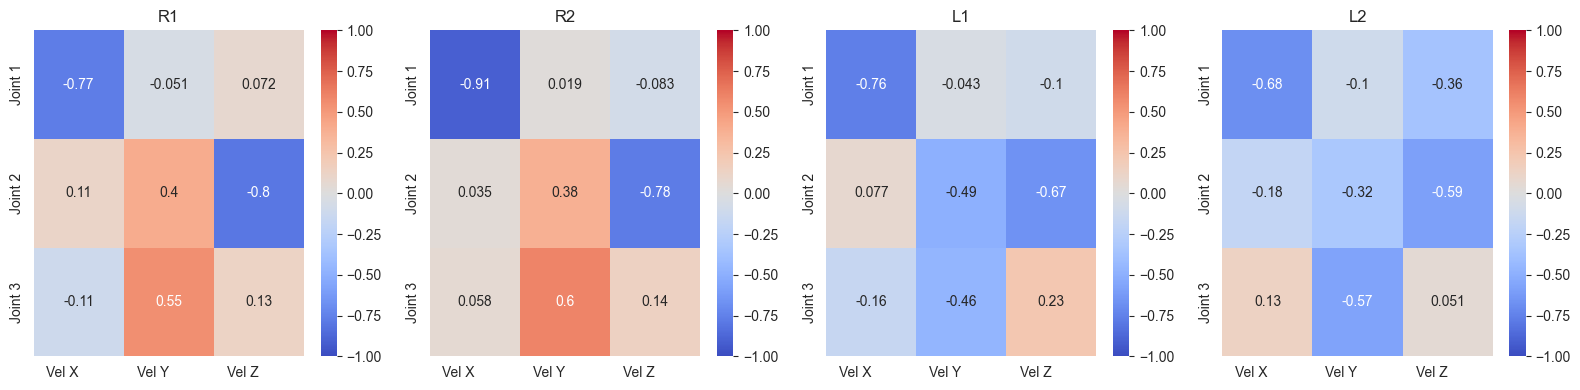

In [10]:
# Set up the figure for subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Loop over each matrix and plot it as a heatmap
for i, (matrix, title) in enumerate(zip(W_norm, leg_label)):
    sns.heatmap(matrix, annot=True, cmap='coolwarm', center=0, ax=axes[i], 
                vmin=-1, vmax=1, cbar=True)
    axes[i].set_title(title)
    axes[i].set_xticklabels(['Vel X', 'Vel Y', 'Vel Z'], ha='right')
    axes[i].set_yticklabels(['Joint 1', 'Joint 2', 'Joint 3'], ha='right')

plt.tight_layout()
plt.show()

In [198]:
# Prediction for new joint velocities (optional)
new_joint_velocities = np.array([[1.0, 0.0, 0.0]])  # Example input
predicted_body_velocities = new_joint_velocities @ W
print("\nPredicted Body Velocities for new joint velocities:")
print(predicted_body_velocities)



Predicted Body Velocities for new joint velocities:
[[-0.28836441 -0.00059568  0.        ]]


In [139]:
df['Body Vel X'], df['Body Vel Y'], df['Body Vel Z']

(0     -0.000
 1     -0.260
 2     -0.488
 3     -0.610
 4     -0.621
        ...  
 898    0.000
 899    0.000
 900    0.000
 901    0.000
 902    0.000
 Name: Body Vel X, Length: 903, dtype: float64,
 0     -0.000
 1     -0.001
 2     -0.011
 3     -0.025
 4     -0.039
        ...  
 898    0.000
 899    0.000
 900    0.000
 901    0.000
 902    0.000
 Name: Body Vel Y, Length: 903, dtype: float64,
 0     -0.0
 1     -0.0
 2     -0.0
 3     -0.0
 4     -0.0
       ... 
 898   -0.0
 899   -0.0
 900   -0.0
 901   -0.0
 902   -0.0
 Name: Body Vel Z, Length: 903, dtype: float64)

In [140]:
# Generate synthetic data
# X is the input matrix with shape (n_samples, 3), where n_samples = 100
np.random.seed(42)
n_samples = 100
X = np.random.rand(n_samples, 3)

# Define a true weight matrix W_true and bias b_true for generating outputs
W_true = np.array([[2, -1, 0.5],
                   [1.5, 2, -0.5],
                   [1, 0, 1]])

b_true = np.array([1, 2, 3])

# Generate outputs Y using the linear relationship Y = XW_true + b_true
Y = X @ W_true + b_true

# Linear regression solution using normal equation
# Adding a column of ones to X for the bias term
X_b = np.hstack([X, np.ones((n_samples, 1))])

# Solve for the weights and bias using normal equation: W = (X_b.T X_b)^(-1) X_b.T Y
W_b = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ Y

# Extract the weight matrix W and bias vector b from the result
W_est = W_b[:-1, :]  # First 3 rows are weights
b_est = W_b[-1, :]   # Last row is the bias

# Output the estimated weights and bias
print("Estimated weight matrix W:")
print(W_est)

print("\nEstimated bias vector b:")
print(b_est)

# Compare with the true weights and bias
print("\nTrue weight matrix W_true:")
print(W_true)

print("\nTrue bias vector b_true:")
print(b_true)


Estimated weight matrix W:
[[ 2.00000000e+00 -1.00000000e+00  5.00000000e-01]
 [ 1.50000000e+00  2.00000000e+00 -5.00000000e-01]
 [ 1.00000000e+00 -1.45678929e-15  1.00000000e+00]]

Estimated bias vector b:
[1. 2. 3.]

True weight matrix W_true:
[[ 2.  -1.   0.5]
 [ 1.5  2.  -0.5]
 [ 1.   0.   1. ]]

True bias vector b_true:
[1 2 3]


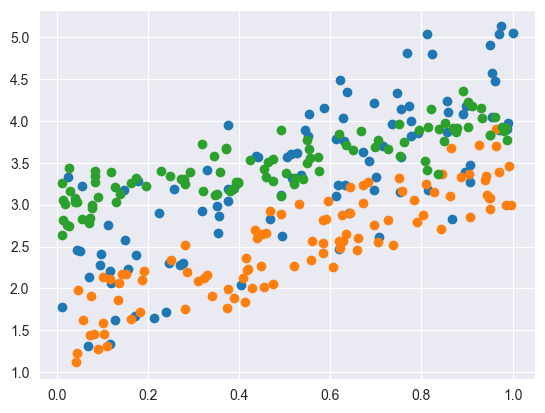

In [141]:
X_new = np.random.rand(100, 3)  # New input sample
Y_pred = X_new @ W_est + b_est

for i in range(3):
    # plt.scatter(X[:,i], Y[:,i])
    plt.scatter(X_new[:,i], Y_pred[:,i])

## Dung beetle Morphology

In [28]:
df = pd.read_csv('./Compliance_JVel_BVel_fullbody_leader_Org_DB_.csv')
df.head()

,Time (s),JointVel_1_R1,JointVel_2_R1,JointVel_3_R1,JointVel_1_R2,JointVel_2_R2,JointVel_3_R2,JointVel_1_L1,JointVel_2_L1,JointVel_3_L1,...,Body Vel Z R1,Body Vel X R2,Body Vel Y R2,Body Vel Z R2,Body Vel X L1,Body Vel Y L1,Body Vel Z L1,Body Vel X L2,Body Vel Y L2,Body Vel Z L2
0,1.00,-0.221,-0.094,0.098,-0.130,-0.154,0.054,-0.046,0.019,-0.043,...,0.043,0.041,-0.010,-0.001,0.022,0.014,0.017,0.022,-0.010,-0.026
1,1.01,-0.626,-0.238,0.265,-0.383,-0.416,0.140,-0.139,0.026,-0.106,...,0.087,0.088,-0.024,-0.005,0.047,0.029,0.042,0.047,-0.024,-0.050
2,1.02,-0.869,-0.209,0.312,-0.611,-0.491,0.133,-0.240,-0.087,-0.082,...,0.107,0.122,-0.038,-0.016,0.063,0.037,0.067,0.064,-0.038,-0.056
3,1.03,-1.007,-0.128,0.310,-0.781,-0.498,0.100,-0.313,-0.208,-0.038,...,0.117,0.144,-0.049,-0.025,0.073,0.042,0.085,0.074,-0.049,-0.057
4,1.04,-1.083,-0.071,0.308,-0.881,-0.511,0.083,-0.343,-0.273,-0.014,...,0.121,0.157,-0.056,-0.028,0.076,0.045,0.092,0.079,-0.057,-0.056


In [29]:
# Filter out rows where Joint Vel 1, Joint Vel 2, and Joint Vel 3 are all zero
df = df[~((abs(df["JointVel_1_R1"]) < 0.1) & 
          (abs(df["JointVel_2_R1"]) < 0.1) & 
          (abs(df["JointVel_3_R1"]) < 0.1) &
          (abs(df["JointVel_1_R2"]) < 0.1) & 
          (abs(df["JointVel_2_R2"]) < 0.1) &
          (abs(df["JointVel_3_R2"]) < 0.1) &
          (abs(df["JointVel_1_L1"]) < 0.1) & 
          (abs(df["JointVel_2_L1"]) < 0.1) & 
          (abs(df["JointVel_3_L1"]) < 0.1) &
          (abs(df["JointVel_1_L2"]) < 0.1) & 
          (abs(df["JointVel_2_L2"]) < 0.1) & 
          (abs(df["JointVel_3_L2"]) < 0.1)
          )]

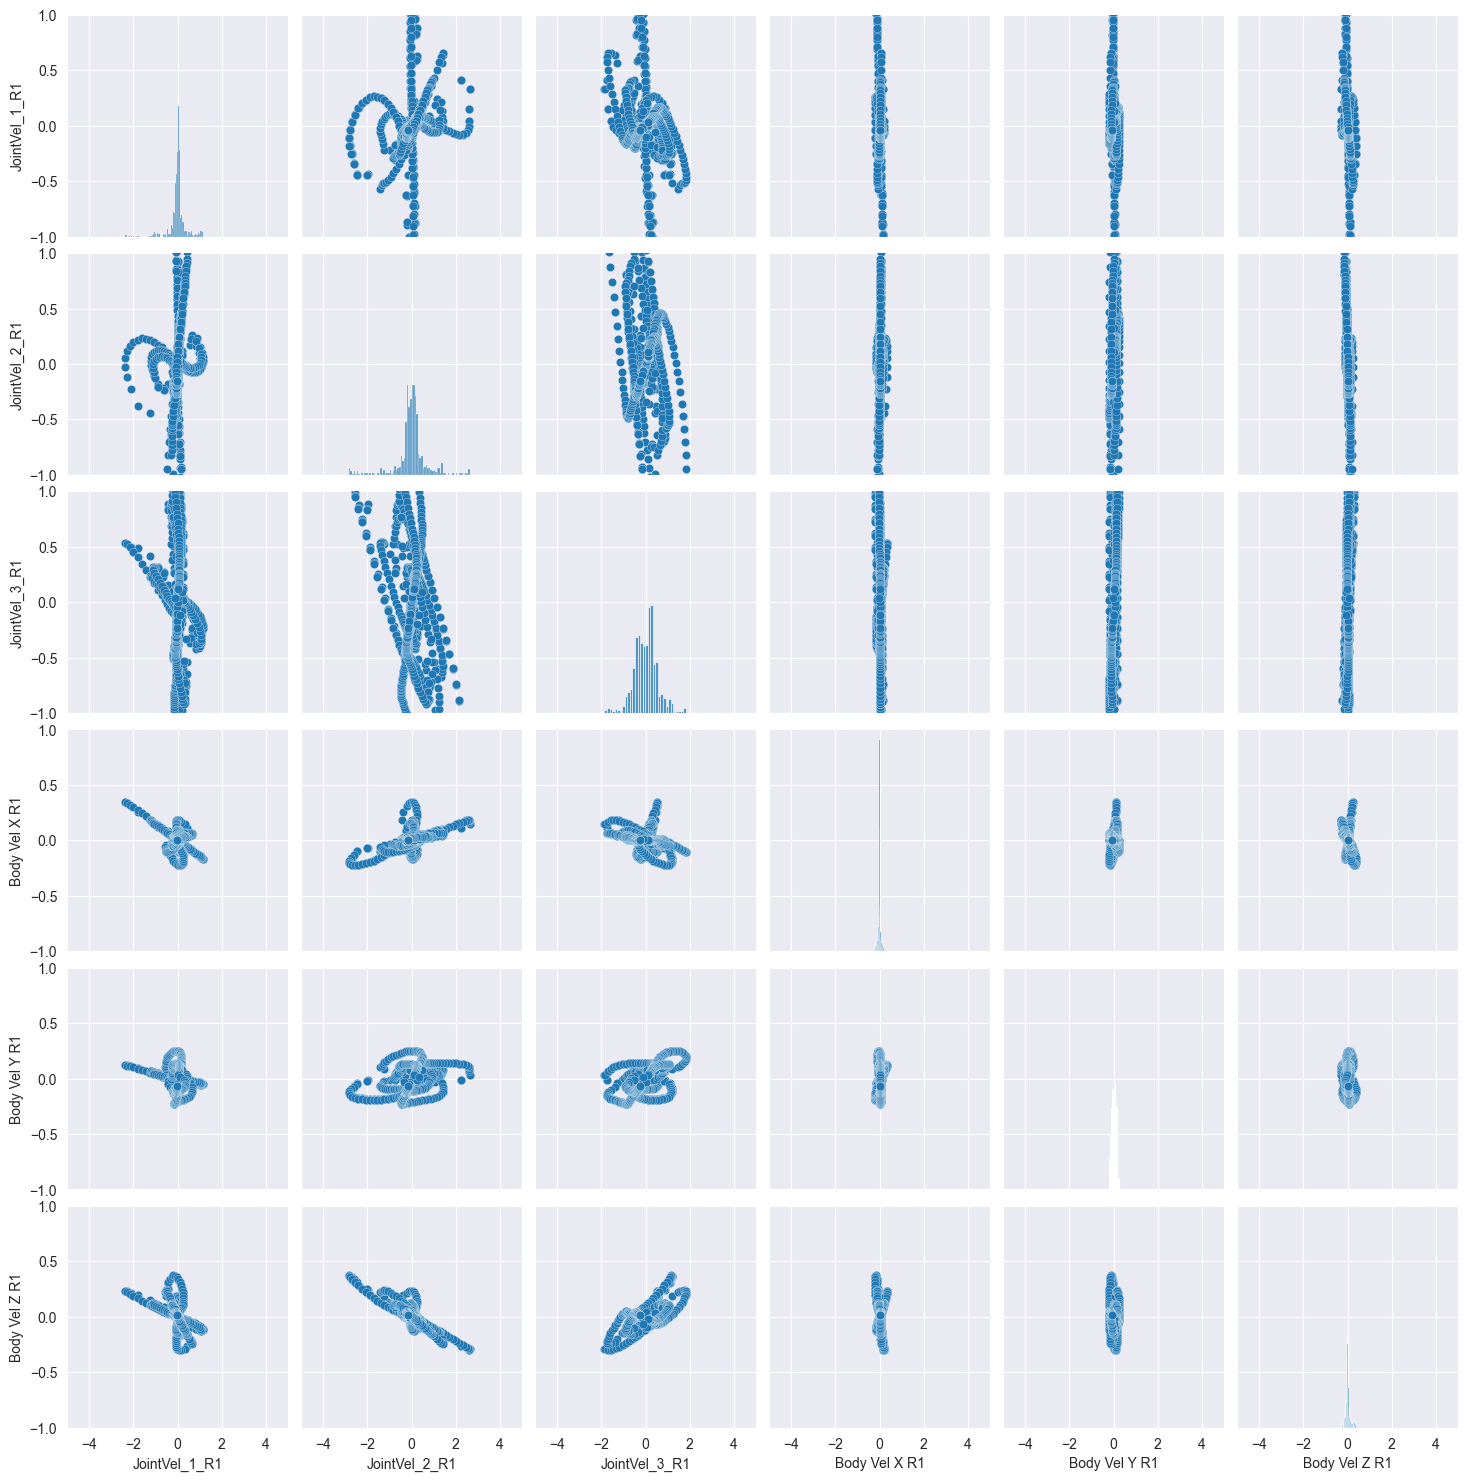

In [30]:
# independent joitn activation (calibrate data)
selected_colums_R1 = ["JointVel_1_R1", "JointVel_2_R1", "JointVel_3_R1", "Body Vel X R1", "Body Vel Y R1", "Body Vel Z R1"]
selected_colums_R2 = ["JointVel_1_R2", "JointVel_2_R2", "JointVel_3_R2", "Body Vel X R2", "Body Vel Y R2", "Body Vel Z R2"]
selected_colums_L1 = ["JointVel_1_L1", "JointVel_2_L1", "JointVel_3_L1", "Body Vel X L1", "Body Vel Y L1", "Body Vel Z L1"]
selected_colums_L2 = ["JointVel_1_L2", "JointVel_2_L2", "JointVel_3_L2", "Body Vel X L2", "Body Vel Y L2", "Body Vel Z L2"]
pair_plot = sns.pairplot(df[selected_colums_R1],
                         plot_kws={'edgecolor': 'white', 'linewidth': 0.2})
pair_plot.set(xlim=(-5,5), ylim = (-1,1))


In [31]:
df.columns

Index(['Time (s)', 'JointVel_1_R1', 'JointVel_2_R1', 'JointVel_3_R1',
       'JointVel_1_R2', 'JointVel_2_R2', 'JointVel_3_R2', 'JointVel_1_L1',
       'JointVel_2_L1', 'JointVel_3_L1', 'JointVel_1_L2', 'JointVel_2_L2',
       'JointVel_3_L2', 'Body Vel X R1', 'Body Vel Y R1', 'Body Vel Z R1',
       'Body Vel X R2', 'Body Vel Y R2', 'Body Vel Z R2', 'Body Vel X L1',
       'Body Vel Y L1', 'Body Vel Z L1', 'Body Vel X L2', 'Body Vel Y L2',
       'Body Vel Z L2'],
      dtype='object')

In [32]:
# Step 1: Melt the joint velocities into a single 'Joint Vel' column with a 'Joint Number'
df_joint_melt = df.melt(id_vars=['Time (s)'], 
                        value_vars=['JointVel_1_R1', 'JointVel_2_R1', 'JointVel_3_R1'],
                        var_name='Joint Number', 
                        value_name='Joint Vel')

# Extract the joint number from the column name and clean it up
df_joint_melt['Joint Number'] = df_joint_melt['Joint Number'].str.extract('(\d)').astype(int)

# Step 2: Melt the body velocities into a single 'Body Vel' column with an 'Axis'
df_body_melt = df.melt(id_vars=['Time (s)'], 
                       value_vars=['Body Vel X R1', 'Body Vel Y R1', 'Body Vel Z R1'],
                       var_name='Body Axis', 
                       value_name='Body Vel')

# Extract the axis from the column name and clean it up
df_body_melt['Body Axis'] = df_body_melt['Body Axis'].str.extract('([XYZ])')

# Step 3: Merge the two melted DataFrames back into one (on Time)
df_final = pd.merge(df_joint_melt, df_body_melt, on='Time (s)')

# Show the resulting DataFrame
df_final

,Time (s),Joint Number,Joint Vel,Body Axis,Body Vel
0,1.00,1,-0.221,X,0.041
1,1.00,1,-0.221,Y,0.014
2,1.00,1,-0.221,Z,0.043
3,1.00,2,-0.094,X,0.041
4,1.00,2,-0.094,Y,0.014
...,...,...,...,...,...
11083,21.99,2,-0.150,Y,-0.065
11084,21.99,2,-0.150,Z,0.012
11085,21.99,3,-0.232,X,-0.001
11086,21.99,3,-0.232,Y,-0.065


C:\Users\binggwong\AppData\Local\Temp\ipykernel_21800\4220753205.py:5: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(
C:\Users\binggwong\AppData\Local\Temp\ipykernel_21800\4220753205.py:11: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(


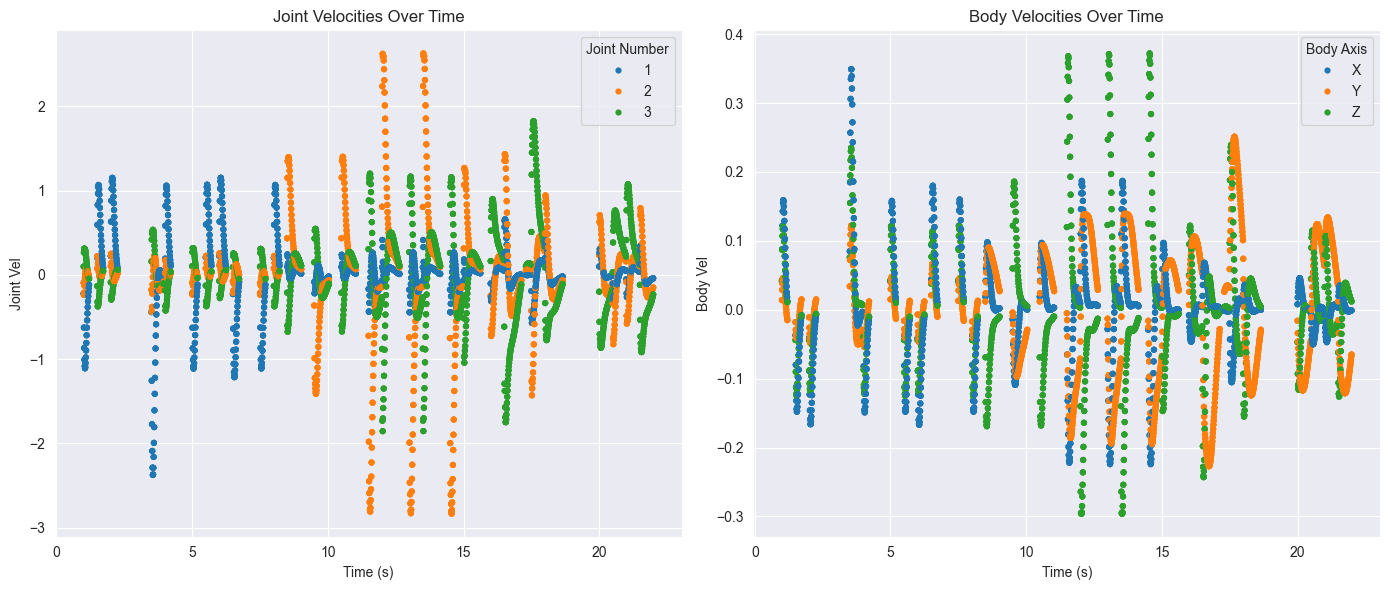

In [33]:
# Create a figure with two subplots (left and right)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First relational plot (left)
sns.scatterplot(
    x='Time (s)', y='Joint Vel', hue='Joint Number', data=df_final, ax=axes[0], palette=sns.color_palette(),edgecolor='none', s=20
)
axes[0].set_title('Joint Velocities Over Time')

# Second relational plot (right)
sns.scatterplot(
    x='Time (s)', y='Body Vel', hue='Body Axis', data=df_final, ax=axes[1], palette=sns.color_palette(), edgecolor='none', s=20 
)
axes[1].set_title('Body Velocities Over Time')

# Adjust layout to avoid overlap
plt.tight_layout()
# Show the combined plots
plt.show()

### All legs weight estimation

In [34]:
Weights = []
# Define X (input features) and Y (output labels) in a generalized way
leg_label = ['R1', 'R2', 'L1', 'L2']
for i in range(4):
    X = df[["JointVel_1_"+leg_label[i], "JointVel_2_"+leg_label[i], "JointVel_3_"+leg_label[i]]].values  # Input: Joint velocities
    Y = df[["Body Vel X "+leg_label[i], "Body Vel Y "+leg_label[i], "Body Vel Z "+leg_label[i]]].values      # Output: Body velocities

    # Solve the linear regression using the normal equation: W = (X.T X)^(-1) X.T Y
    W = np.linalg.inv(X.T @ X) @ X.T @ Y

    Weights.append(W)

# Print the estimated weights (Jacobian matrix)
for i in range(4):
    print("Estimated Jacobian Matrix (W) number {}: ".format(i+1))
    print(Weights[i])
    print('-----')

Estimated Jacobian Matrix (W) number 1: 
[[-0.1483194  -0.00274625 -0.09353479]
 [ 0.0664956   0.13289182 -0.10622642]
 [-0.02822658  0.18703063  0.02366931]]
-----
Estimated Jacobian Matrix (W) number 2: 
[[-0.17405151  0.01358896  0.0910948 ]
 [-0.02240489  0.11402261 -0.09575409]
 [-0.02622443  0.21125265  0.01895509]]
-----
Estimated Jacobian Matrix (W) number 3: 
[[-0.13583585 -0.02567982 -0.15749106]
 [ 0.0871915  -0.16171634 -0.12602364]
 [-0.06803708 -0.16276235  0.04978829]]
-----
Estimated Jacobian Matrix (W) number 4: 
[[-0.09894328 -0.00104034  0.05799955]
 [-0.0851347  -0.10455587 -0.02265657]
 [ 0.06626041 -0.20866747 -0.03397432]]
-----


In [35]:
# Add a small epsilon to avoid division by zero
epsilon = 1e-8  # Small value to prevent division by zero

# Compute the maximum along the columns, but add epsilon to prevent division by zero
for i in range(4):
    sum_joint_contr = np.sum(abs(Weights[i]), axis=0, keepdims=True) + epsilon
    print(sum_joint_contr)

    # Perform the division safely
    W_normalized = Weights[i] / sum_joint_contr

    # Print the result
    print("Normalize Jacobian Matrix (W) {} :".format(i+1))
    print(W_normalized)
    print('-------')


[[0.24304159 0.3226687  0.22343053]]
Normalize Jacobian Matrix (W) 1 :
[[-0.61026345 -0.00851104 -0.4186303 ]
 [ 0.27359764  0.41185222 -0.47543376]
 [-0.11613887  0.57963671  0.10593589]]
-------
[[0.22268084 0.33886424 0.20580399]]
Normalize Jacobian Matrix (W) 2 :
[[-0.78161872  0.0401015   0.44262894]
 [-0.10061435  0.33648464 -0.4652684 ]
 [-0.11776689  0.62341382  0.09210262]]
-------
[[0.29106444 0.35015852 0.33330299]]
Normalize Jacobian Matrix (W) 3 :
[[-0.46668653 -0.0733377  -0.47251618]
 [ 0.2995608  -0.46183751 -0.37810533]
 [-0.23375264 -0.46482476  0.14937845]]
-------
[[0.25033841 0.31426369 0.11463044]]
Normalize Jacobian Matrix (W) 4 :
[[-0.39523812 -0.00331042  0.50596985]
 [-0.34007847 -0.33270108 -0.19764879]
 [ 0.26468337 -0.66398847 -0.29638127]]
-------


In [36]:
w_ref = np.array([[-0.61448448, -0.01260813, -0.42119712],
                  [ 0.26719482,  0.43758255, -0.46174036],
                  [-0.11832065,  0.54980929,  0.11706247]])
W_norm = []
for i in range(4):
    sum_joint_contr = np.sum(abs(Weights[i]), axis=0, keepdims=True) + epsilon
    print(sum_joint_contr)

    # Perform the division safely
    W_normalized = Weights[i] / sum_joint_contr
    W_norm.append(W_normalized)

    # Print the result
    print("Normalize Jacobian Matrix (W) {} :".format(i+1))
    print(w_ref-W_normalized)
    print('-------')

[[0.24304159 0.3226687  0.22343053]]
Normalize Jacobian Matrix (W) 1 :
[[-0.00422103 -0.00409709 -0.00256682]
 [-0.00640282  0.02573033  0.0136934 ]
 [-0.00218178 -0.02982742  0.01112658]]
-------
[[0.22268084 0.33886424 0.20580399]]
Normalize Jacobian Matrix (W) 2 :
[[ 1.67134243e-01 -5.27096314e-02 -8.63826056e-01]
 [ 3.67809166e-01  1.01097905e-01  3.52803842e-03]
 [-5.53764179e-04 -7.36045342e-02  2.49598533e-02]]
-------
[[0.29106444 0.35015852 0.33330299]]
Normalize Jacobian Matrix (W) 3 :
[[-0.14779795  0.06072957  0.05131906]
 [-0.03236598  0.89942006 -0.08363503]
 [ 0.11543199  1.01463405 -0.03231598]]
-------
[[0.25033841 0.31426369 0.11463044]]
Normalize Jacobian Matrix (W) 4 :
[[-0.21924636 -0.00929771 -0.92716697]
 [ 0.60727329  0.77028363 -0.26409157]
 [-0.38300402  1.21379776  0.41344374]]
-------


In [37]:
W_norm

[array([[-0.61026345, -0.00851104, -0.4186303 ],
        [ 0.27359764,  0.41185222, -0.47543376],
        [-0.11613887,  0.57963671,  0.10593589]]),
 array([[-0.78161872,  0.0401015 ,  0.44262894],
        [-0.10061435,  0.33648464, -0.4652684 ],
        [-0.11776689,  0.62341382,  0.09210262]]),
 array([[-0.46668653, -0.0733377 , -0.47251618],
        [ 0.2995608 , -0.46183751, -0.37810533],
        [-0.23375264, -0.46482476,  0.14937845]]),
 array([[-0.39523812, -0.00331042,  0.50596985],
        [-0.34007847, -0.33270108, -0.19764879],
        [ 0.26468337, -0.66398847, -0.29638127]])]

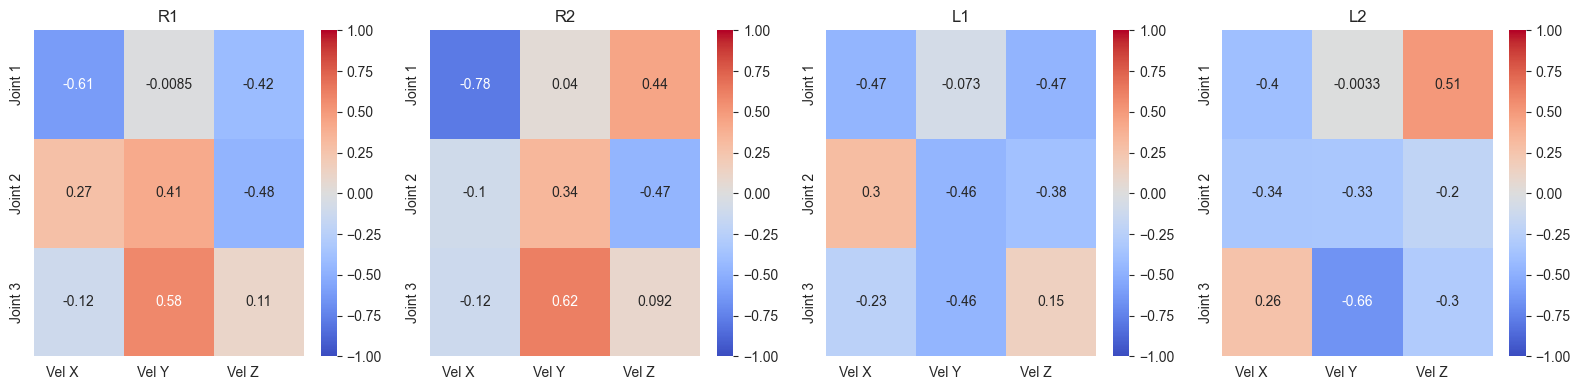

In [38]:
# Set up the figure for subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Loop over each matrix and plot it as a heatmap
for i, (matrix, title) in enumerate(zip(W_norm, leg_label)):
    sns.heatmap(matrix, annot=True, cmap='coolwarm', center=0, ax=axes[i], 
                vmin=-1, vmax=1, cbar=True)
    axes[i].set_title(title)
    axes[i].set_xticklabels(['Vel X', 'Vel Y', 'Vel Z'], ha='right')
    axes[i].set_yticklabels(['Joint 1', 'Joint 2', 'Joint 3'], ha='right')

plt.tight_layout()
plt.show()

## Quadruped Morphology

In [13]:
df = pd.read_csv('./Compliance_JVel_BVel_fullbody_leader_Org_Quadruped_.csv')
df.head()

,Time (s),JointVel_1_R1,JointVel_2_R1,JointVel_3_R1,JointVel_1_R2,JointVel_2_R2,JointVel_3_R2,JointVel_1_L1,JointVel_2_L1,JointVel_3_L1,...,Body Vel Z R1,Body Vel X R2,Body Vel Y R2,Body Vel Z R2,Body Vel X L1,Body Vel Y L1,Body Vel Z L1,Body Vel X L2,Body Vel Y L2,Body Vel Z L2
0,1.00,-0.758,-0.326,0.446,-0.615,-0.356,0.505,0.758,0.266,-0.449,...,0.131,-0.036,-0.041,0.127,0.014,-0.103,-0.135,0.014,-0.042,-0.139
1,1.01,-1.852,-0.696,0.988,-1.470,-0.799,1.196,1.842,0.654,-0.983,...,0.188,-0.047,-0.085,0.182,0.032,-0.187,-0.188,0.032,-0.090,-0.193
2,1.02,-1.722,-0.178,0.057,-0.999,-0.367,0.449,1.293,0.266,-0.202,...,0.080,-0.032,-0.114,0.070,0.023,-0.187,-0.065,0.024,-0.118,-0.075
3,1.03,-1.009,0.102,-0.507,-0.467,-0.038,-0.215,0.698,-0.070,0.450,...,0.004,-0.033,-0.118,0.002,0.023,-0.190,0.002,0.023,-0.118,0.000
4,1.04,-0.891,-0.083,-0.294,-0.552,-0.181,-0.094,0.902,0.012,0.403,...,0.030,-0.046,-0.119,0.031,0.038,-0.230,-0.031,0.039,-0.121,-0.030


In [14]:
# Filter out rows where Joint Vel 1, Joint Vel 2, and Joint Vel 3 are all zero
df = df[~((abs(df["JointVel_1_R1"]) < 0.1) & 
          (abs(df["JointVel_2_R1"]) < 0.1) & 
          (abs(df["JointVel_3_R1"]) < 0.1) &
          (abs(df["JointVel_1_R2"]) < 0.1) & 
          (abs(df["JointVel_2_R2"]) < 0.1) &
          (abs(df["JointVel_3_R2"]) < 0.1) &
          (abs(df["JointVel_1_L1"]) < 0.1) & 
          (abs(df["JointVel_2_L1"]) < 0.1) & 
          (abs(df["JointVel_3_L1"]) < 0.1) &
          (abs(df["JointVel_1_L2"]) < 0.1) & 
          (abs(df["JointVel_2_L2"]) < 0.1) & 
          (abs(df["JointVel_3_L2"]) < 0.1)
          )]

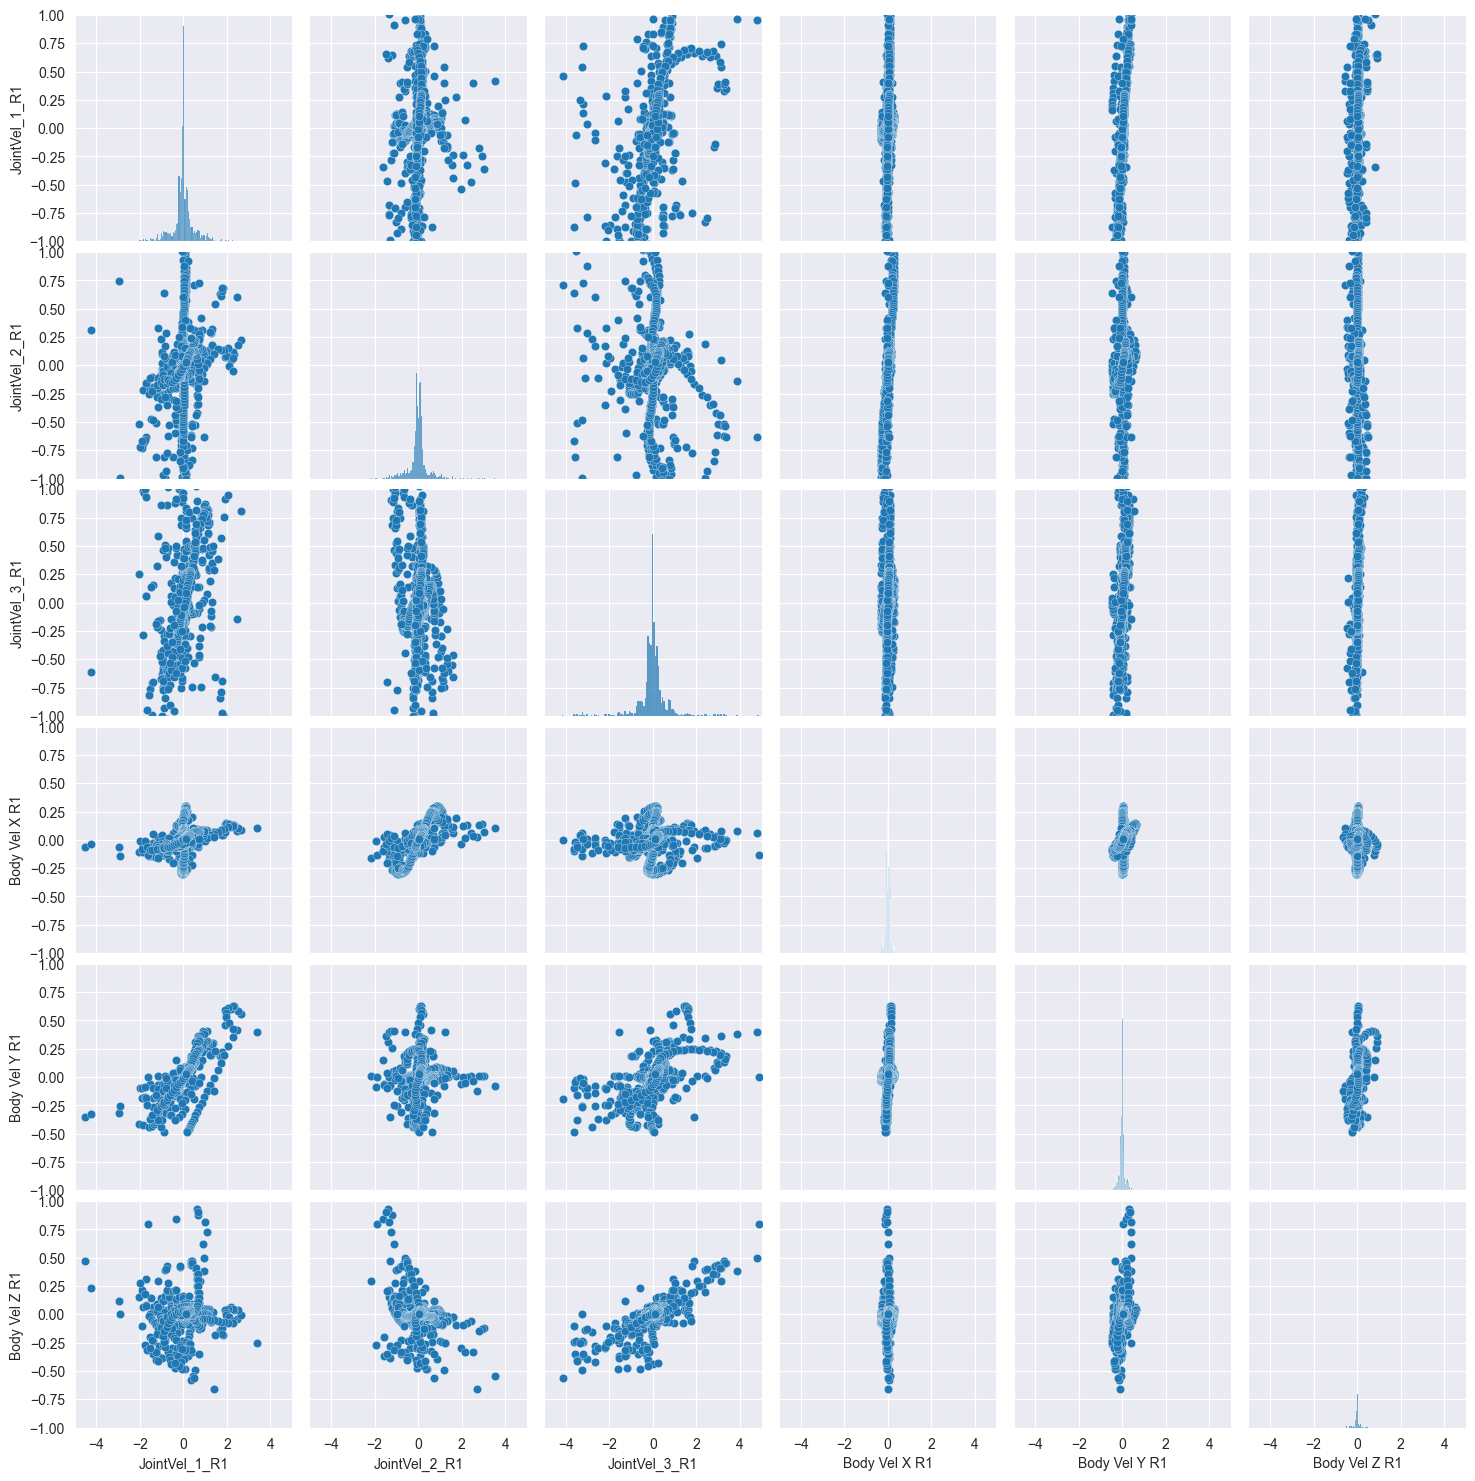

In [15]:
# independent joitn activation (calibrate data)
selected_colums_R1 = ["JointVel_1_R1", "JointVel_2_R1", "JointVel_3_R1", "Body Vel X R1", "Body Vel Y R1", "Body Vel Z R1"]
selected_colums_R2 = ["JointVel_1_R2", "JointVel_2_R2", "JointVel_3_R2", "Body Vel X R2", "Body Vel Y R2", "Body Vel Z R2"]
selected_colums_L1 = ["JointVel_1_L1", "JointVel_2_L1", "JointVel_3_L1", "Body Vel X L1", "Body Vel Y L1", "Body Vel Z L1"]
selected_colums_L2 = ["JointVel_1_L2", "JointVel_2_L2", "JointVel_3_L2", "Body Vel X L2", "Body Vel Y L2", "Body Vel Z L2"]
pair_plot = sns.pairplot(df[selected_colums_R1],
                         plot_kws={'edgecolor': 'white', 'linewidth': 0.2})
pair_plot.set(xlim=(-5,5), ylim = (-1,1))


In [16]:
df.columns

Index(['Time (s)', 'JointVel_1_R1', 'JointVel_2_R1', 'JointVel_3_R1',
       'JointVel_1_R2', 'JointVel_2_R2', 'JointVel_3_R2', 'JointVel_1_L1',
       'JointVel_2_L1', 'JointVel_3_L1', 'JointVel_1_L2', 'JointVel_2_L2',
       'JointVel_3_L2', 'Body Vel X R1', 'Body Vel Y R1', 'Body Vel Z R1',
       'Body Vel X R2', 'Body Vel Y R2', 'Body Vel Z R2', 'Body Vel X L1',
       'Body Vel Y L1', 'Body Vel Z L1', 'Body Vel X L2', 'Body Vel Y L2',
       'Body Vel Z L2'],
      dtype='object')

In [17]:
# Step 1: Melt the joint velocities into a single 'Joint Vel' column with a 'Joint Number'
df_joint_melt = df.melt(id_vars=['Time (s)'], 
                        value_vars=['JointVel_1_R1', 'JointVel_2_R1', 'JointVel_3_R1'],
                        var_name='Joint Number', 
                        value_name='Joint Vel')

# Extract the joint number from the column name and clean it up
df_joint_melt['Joint Number'] = df_joint_melt['Joint Number'].str.extract('(\d)').astype(int)

# Step 2: Melt the body velocities into a single 'Body Vel' column with an 'Axis'
df_body_melt = df.melt(id_vars=['Time (s)'], 
                       value_vars=['Body Vel X R1', 'Body Vel Y R1', 'Body Vel Z R1'],
                       var_name='Body Axis', 
                       value_name='Body Vel')

# Extract the axis from the column name and clean it up
df_body_melt['Body Axis'] = df_body_melt['Body Axis'].str.extract('([XYZ])')

# Step 3: Merge the two melted DataFrames back into one (on Time)
df_final = pd.merge(df_joint_melt, df_body_melt, on='Time (s)')

# Show the resulting DataFrame
df_final

,Time (s),Joint Number,Joint Vel,Body Axis,Body Vel
0,1.00,1,-0.758,X,-0.036
1,1.00,1,-0.758,Y,-0.102
2,1.00,1,-0.758,Z,0.131
3,1.00,2,-0.326,X,-0.036
4,1.00,2,-0.326,Y,-0.102
...,...,...,...,...,...
12928,20.46,2,0.027,Y,0.029
12929,20.46,2,0.027,Z,0.007
12930,20.46,3,0.085,X,0.009
12931,20.46,3,0.085,Y,0.029


C:\Users\binggwong\AppData\Local\Temp\ipykernel_83604\4220753205.py:5: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(
C:\Users\binggwong\AppData\Local\Temp\ipykernel_83604\4220753205.py:11: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(


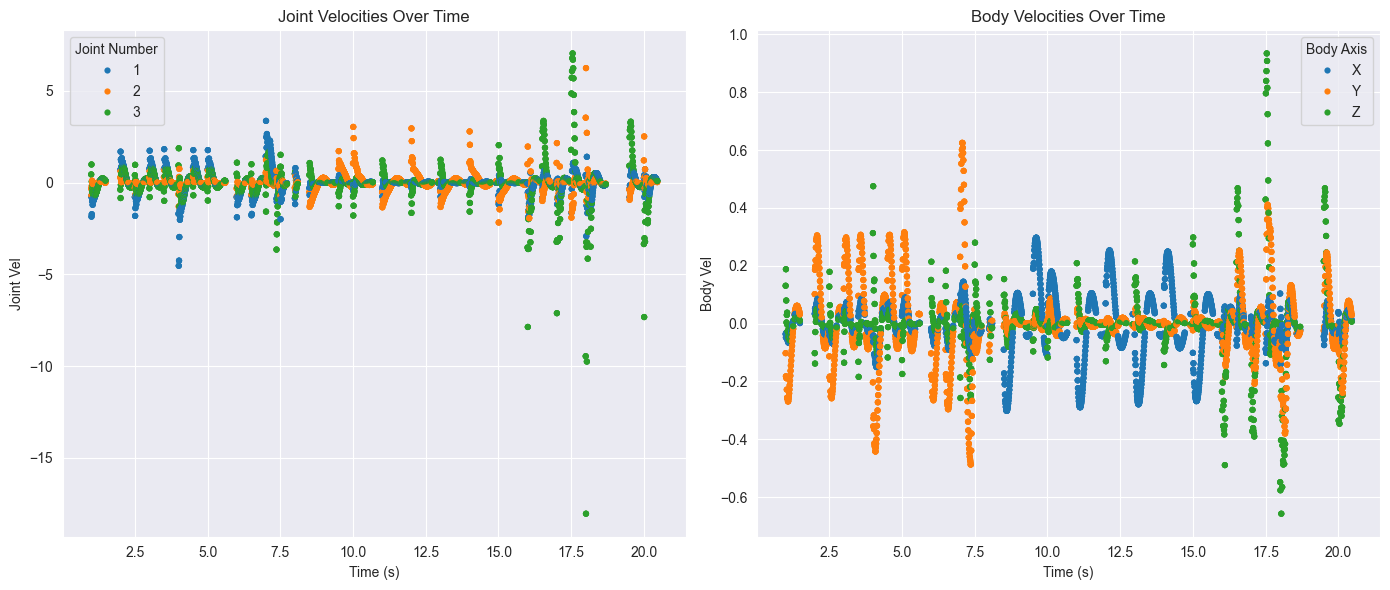

In [18]:
# Create a figure with two subplots (left and right)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First relational plot (left)
sns.scatterplot(
    x='Time (s)', y='Joint Vel', hue='Joint Number', data=df_final, ax=axes[0], palette=sns.color_palette(),edgecolor='none', s=20
)
axes[0].set_title('Joint Velocities Over Time')

# Second relational plot (right)
sns.scatterplot(
    x='Time (s)', y='Body Vel', hue='Body Axis', data=df_final, ax=axes[1], palette=sns.color_palette(), edgecolor='none', s=20 
)
axes[1].set_title('Body Velocities Over Time')

# Adjust layout to avoid overlap
plt.tight_layout()
# Show the combined plots
plt.show()

### All legs weight estimation

In [19]:
Weights = []
# Define X (input features) and Y (output labels) in a generalized way
leg_label = ['R1', 'R2', 'L1', 'L2']
for i in range(4):
    X = df[["JointVel_1_"+leg_label[i], "JointVel_2_"+leg_label[i], "JointVel_3_"+leg_label[i]]].values  # Input: Joint velocities
    Y = df[["Body Vel X "+leg_label[i], "Body Vel Y "+leg_label[i], "Body Vel Z "+leg_label[i]]].values      # Output: Body velocities

    # Solve the linear regression using the normal equation: W = (X.T X)^(-1) X.T Y
    W = np.linalg.inv(X.T @ X) @ X.T @ Y

    Weights.append(W)

# Print the estimated weights (Jacobian matrix)
for i in range(4):
    print("Estimated Jacobian Matrix (W) number {}: ".format(i+1))
    print(Weights[i])
    print('-----')

Estimated Jacobian Matrix (W) number 1: 
[[-0.00391344  0.17320998 -0.04366299]
 [ 0.19038655  0.01513738  0.03333294]
 [ 0.04877172  0.03894589  0.09939942]]
-----
Estimated Jacobian Matrix (W) number 2: 
[[ 0.00247478  0.15807618 -0.05088347]
 [ 0.20446773 -0.02062593  0.03965238]
 [ 0.07151912  0.08692416  0.12797454]]
-----
Estimated Jacobian Matrix (W) number 3: 
[[-0.00752014 -0.20930602 -0.07186729]
 [ 0.35629573 -0.06753258  0.01348158]
 [ 0.05158571 -0.05164638  0.14217986]]
-----
Estimated Jacobian Matrix (W) number 4: 
[[ 0.05066521 -0.1458881  -0.04291105]
 [ 0.1592545   0.02930733  0.03227517]
 [ 0.23422888 -0.09520005  0.13838142]]
-----


In [20]:
# Add a small epsilon to avoid division by zero
epsilon = 1e-8  # Small value to prevent division by zero

# Compute the maximum along the columns, but add epsilon to prevent division by zero
for i in range(4):
    sum_joint_contr = np.sum(abs(Weights[i]), axis=0, keepdims=True) + epsilon
    print(sum_joint_contr)

    # Perform the division safely
    W_normalized = Weights[i] / sum_joint_contr

    # Print the result
    print("Normalize Jacobian Matrix (W) {} :".format(i+1))
    print(W_normalized)
    print('-------')


[[0.24307171 0.22729327 0.17639537]]
Normalize Jacobian Matrix (W) 1 :
[[-0.01609994  0.76205505 -0.24752913]
 [ 0.78325258  0.06659847  0.18896722]
 [ 0.20064743  0.17134644  0.56350359]]
-------
[[0.27846164 0.26562629 0.2185104 ]]
Normalize Jacobian Matrix (W) 2 :
[[ 0.00888733  0.59510745 -0.23286519]
 [ 0.73427612 -0.07765018  0.1814668 ]
 [ 0.25683651  0.32724232  0.58566796]]
-------
[[0.41540158 0.32848499 0.22752874]]
Normalize Jacobian Matrix (W) 3 :
[[-0.01810331 -0.63718595 -0.31586027]
 [ 0.85771393 -0.20558802  0.05925222]
 [ 0.12418274 -0.15722601  0.62488746]]
-------
[[0.4441486  0.27039549 0.21356765]]
Normalize Jacobian Matrix (W) 4 :
[[ 0.11407265 -0.539536   -0.20092487]
 [ 0.3585613   0.10838691  0.15112386]
 [ 0.52736603 -0.35207705  0.64795122]]
-------


In [24]:
w_ref = np.array([[-0.01609994,  0.76205505, -0.24752913],
                  [ 0.78325258,  0.06659847,  0.18896722,]
                  [ 0.20064743,  0.17134644,  0.56350359]])
W_norm = []
for i in range(4):
    sum_joint_contr = np.sum(abs(Weights[i]), axis=0, keepdims=True) + epsilon
    print(sum_joint_contr)

    # Perform the division safely
    W_normalized = Weights[i] / sum_joint_contr
    W_norm.append(W_normalized)

    # Print the result
    print("Normalize Jacobian Matrix (W) {} :".format(i+1))
    print(w_ref-W_normalized)
    print('-------')

<>:2: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:2: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
C:\Users\binggwong\AppData\Local\Temp\ipykernel_83604\562198324.py:2: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [ 0.78325258,  0.06659847,  0.18896722,]
C:\Users\binggwong\AppData\Local\Temp\ipykernel_83604\562198324.py:2: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [ 0.78325258,  0.06659847,  0.18896722,]
C:\Users\binggwong\AppData\Local\Temp\ipykernel_83604\562198324.py:2: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [ 0.78325258,  0.06659847,  0.18896722,]


TypeError: list indices must be integers or slices, not tuple

In [25]:
W_norm

[array([[-0.01609994,  0.76205505, -0.24752913],
        [ 0.78325258,  0.06659847,  0.18896722],
        [ 0.20064743,  0.17134644,  0.56350359]]),
 array([[ 0.00888733,  0.59510745, -0.23286519],
        [ 0.73427612, -0.07765018,  0.1814668 ],
        [ 0.25683651,  0.32724232,  0.58566796]]),
 array([[-0.01810331, -0.63718595, -0.31586027],
        [ 0.85771393, -0.20558802,  0.05925222],
        [ 0.12418274, -0.15722601,  0.62488746]]),
 array([[ 0.11407265, -0.539536  , -0.20092487],
        [ 0.3585613 ,  0.10838691,  0.15112386],
        [ 0.52736603, -0.35207705,  0.64795122]])]

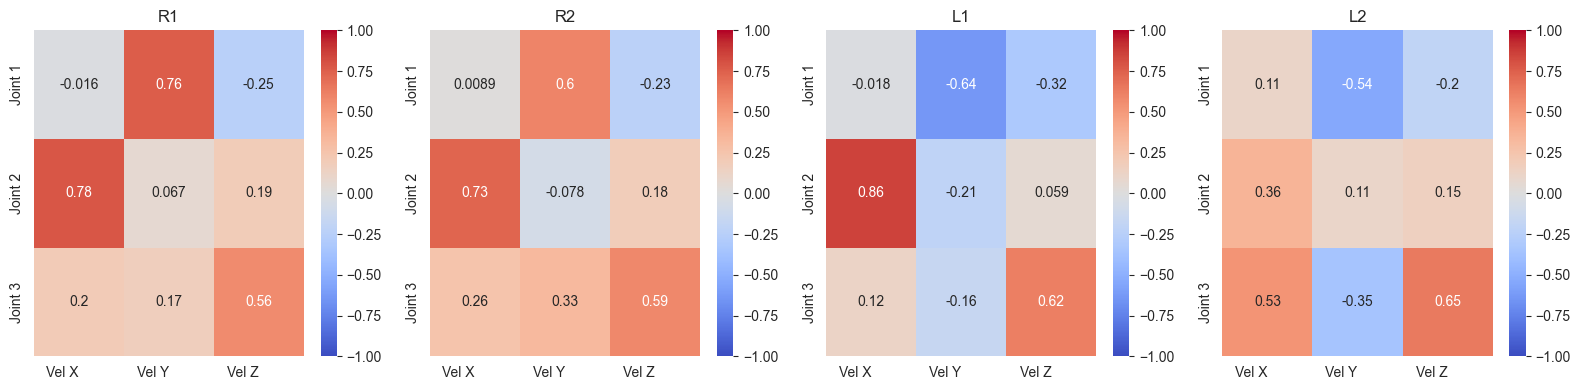

In [26]:
# Set up the figure for subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Loop over each matrix and plot it as a heatmap
for i, (matrix, title) in enumerate(zip(W_norm, leg_label)):
    sns.heatmap(matrix, annot=True, cmap='coolwarm', center=0, ax=axes[i], 
                vmin=-1, vmax=1, cbar=True)
    axes[i].set_title(title)
    axes[i].set_xticklabels(['Vel X', 'Vel Y', 'Vel Z'], ha='right')
    axes[i].set_yticklabels(['Joint 1', 'Joint 2', 'Joint 3'], ha='right')

plt.tight_layout()
plt.show()